In [1]:
import os

import gym
import gym_novel_gridworlds
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines import DDPG
from stable_baselines.ddpg.policies import LnMlpPolicy
from stable_baselines import results_plotter
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec
from stable_baselines.common.callbacks import BaseCallback

In [2]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """

    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

            # Retrieve training reward
            x, y = ts2xy(load_results(self.log_dir), 'timesteps')
            if len(x) > 0:
                # Mean training reward over the last 100 episodes
                mean_reward = np.mean(y[-100:])
                if self.verbose > 0:
                    print("Num timesteps: {}".format(self.num_timesteps))
                    print(
                        "Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward,
                                                                                                 mean_reward))

                # New best model, you could save the agent here
                if mean_reward > self.best_mean_reward:
                    self.best_mean_reward = mean_reward
                    # Example for saving best model
                    if self.verbose > 0:
                        print("Saving new best model to {}".format(self.save_path))
                    self.model.save(self.save_path)

        return True

In [3]:
# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

time_steps = 10000 #1e5

# Create and wrap the environment
# env_id = 'NovelGridworld-v0'
# env = gym.make(env_id)
env = gym.make('LunarLanderContinuous-v2')

# https://stable-baselines.readthedocs.io/en/master/common/monitor.html
env = Monitor(env, log_dir)

In [4]:
# Add some param noise for exploration
param_noise = AdaptiveParamNoiseSpec(initial_stddev=0.1, desired_action_stddev=0.1)
# Because we use parameter noise, we should use a MlpPolicy with layer normalization
model = DDPG(LnMlpPolicy, env, param_noise=param_noise, verbose=0)
# Create the callback: check every 1000 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)
# Train the agent
model.learn(total_timesteps=int(time_steps), callback=callback)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Num timesteps: 1000
Best mean reward: -inf - Last mean reward per episode: -358.47
Saving new best model to tmp/best_model
Num timesteps: 2000
Best mean reward: -358.47 - Last mean reward per episode: -435.72
Num timesteps: 3000
Best mean reward: -358.47 - Last mean reward per episode: -485.48
Num timesteps: 4000
Best mean reward: -358.47 - Last mean reward per episode: -517.85
Num timesteps: 5000
Best mean reward: -358.47 - Last mean reward per episode: -537.22
Num timesteps: 6000
Best mean reward: -358.47 - Last mean reward per episode: -546.05
Num timesteps: 7000
Best mean reward: -358.47 - Last mean reward per episode: -577.72
Num timesteps: 8000
Best mean reward: -358.47 - Last mean reward per episode: -600.80
Num timesteps: 9000
Best mean reward: -358.47 - Last mean reward per episode: -595.53
Num timesteps: 10000
Best mean reward: -358.47 - Last mean reward per episode: -597.08


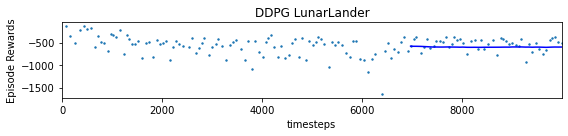

In [5]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "DDPG LunarLander")
plt.show()

146 146


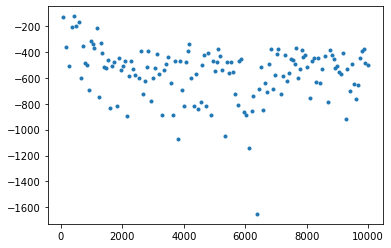

In [13]:
x, y = ts2xy(load_results(log_dir), 'timesteps')

print(len(x), len(y))

plt.plot(x, y, '.')
plt.show()

146 146


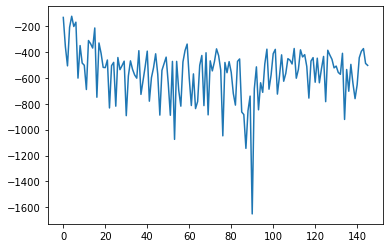

In [10]:
x, y = ts2xy(load_results(log_dir), 'episodes')

print(len(x), len(y))

plt.plot(x, y)
plt.show()

In [11]:
print(env.get_episode_rewards())
print(env.get_episode_lengths())

[-134.26612463895316, -360.32005002190283, -508.02406517349175, -210.49727505736237, -125.08464915447112, -204.20297249907318, -170.9207343425632, -602.60809486924, -351.40477912539325, -486.44073935800117, -503.3866245212375, -690.5714558274165, -312.3346186251006, -336.96405973083586, -370.56309689162623, -215.60272689948113, -750.1853070762676, -331.3348870452287, -410.8368150342561, -519.846686326393, -521.5327929450369, -462.7809595119694, -832.9636075936019, -506.4022817915461, -481.01734865247823, -819.2141863758878, -443.61168756202653, -537.3381625795722, -506.0178789492529, -471.79830703089675, -892.3892355368713, -586.7379833626967, -469.36702145442905, -535.4232911596503, -578.4947511247206, -603.0736829961998, -391.0000818189701, -728.2030855747593, -623.9404217091518, -514.8826789257857, -394.3930555074745, -780.7733001049266, -598.7238355404004, -521.8827295822014, -414.9338008079777, -572.6804562560349, -888.1694177292173, -542.3884663240781, -490.5301789151171, -440.71

In [46]:
from numpy import genfromtxt

#monitor_csv_file = r"tmp\monitor.csv"

#monitor_csv_file = r"C:\Users\GyanT\Documents\GitHub\gym-novel-gridworlds\tests\models\NovelGridworld-v0\monitor.csv"
#monitor_csv_file = r"C:\Users\GyanT\Documents\GitHub\gym-novel-gridworlds\tests\models\NovelGridworld-v3\monitor.csv"
#monitor_csv_file = r"C:\Users\GyanT\Documents\GitHub\gym-novel-gridworlds\tests\models\NovelGridworld-v5_lfd\monitor.csv"

monitor_csv_file = r"C:\Users\GyanT\Documents\GitHub\curriculum_transfer\results\NovelGridworld-v7_testing_goal_env0\monitor.csv"

monitor_csv_path = os.sep.join(monitor_csv_file.split(os.sep)[:-1])

my_data = genfromtxt(monitor_csv_file, delimiter=',', skip_header=2, usecols=(0, 1))

# for row in my_data:
#     print(row)

2422 2422


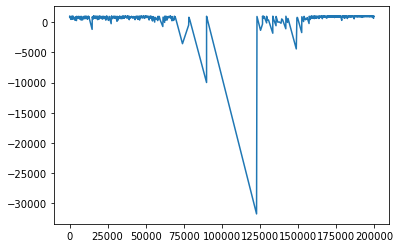

In [47]:
x, y = ts2xy(load_results(monitor_csv_path), 'timesteps')

print(len(x), len(y))

plt.plot(x, y)
plt.show()

2422


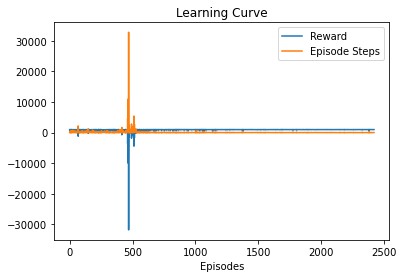

In [48]:
#my_data = my_data[0:2000]

print(len(my_data[:, 0]))

plot_after_steps = 1

plt.plot(my_data[::plot_after_steps, 0], label='Reward')
plt.plot(my_data[::plot_after_steps, 1], label='Episode Steps')
plt.title('Learning Curve')
plt.xlabel("Episodes")
plt.legend()
plt.show()

In [49]:
print(np.mean(my_data[::plot_after_steps, 0]))
print(np.max(my_data[::plot_after_steps, 0]))

918.4698596201487
1000.0


In [50]:
print(np.mean(my_data[::plot_after_steps, 1]))
print(np.min(my_data[::plot_after_steps, 1]))

82.53137902559868
1.0


In [53]:
window_size = 1000

max_reward_steps_ratio = -np.inf
reward_steps_ratio_list = []
for idx in range(0, (len(my_data[:, 0])//window_size)*window_size, window_size):
    #print(idx, idx+window_size)
    mean_reward = np.mean(my_data[:, 0][idx:idx+window_size])
    #print("Reward: ", mean_reward)
    mean_episode_steps = np.mean(my_data[:, 1][idx:idx+window_size])
    #print("Episode Steps: ", mean_episode_steps)
    reward_steps_ratio = mean_reward/mean_episode_steps
    #print("Reward/Episode Steps: ", reward_steps_ratio)
    
    if reward_steps_ratio > max_reward_steps_ratio:
        #print("MAX: ", reward_steps_ratio)
        max_reward_steps_ratio = reward_steps_ratio
        max_reward_steps_ratio_idx = idx+window_size
    
    reward_steps_ratio_list.append(reward_steps_ratio)

print("max_reward_steps_ratio: ", max_reward_steps_ratio)
print("max_reward_steps_ratio_idx: ", max_reward_steps_ratio_idx)

x, y = ts2xy(load_results(monitor_csv_path), 'timesteps')
print("Best # of timesteps: ", x[max_reward_steps_ratio_idx])
print("Best Reward: ", y[max_reward_steps_ratio_idx])

max_reward_steps_ratio:  58.12930474333984
max_reward_steps_ratio_idx:  2000
Best # of timesteps:  194868
Best Reward:  990


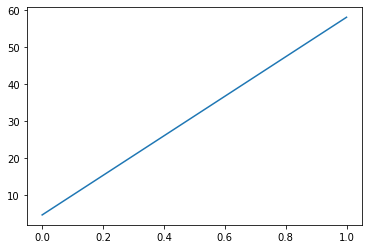

In [52]:
plt.plot(reward_steps_ratio_list)
plt.show()